In [1]:
import numpy as np
import torch
from stable_baselines3.ppo import PPO
from flocking import *
%load_ext autoreload
%autoreload 2

pybullet build time: Nov 28 2023 23:45:17


In [2]:
filename = "/home/lih/fromgit/gym-pybullet-drones/gym_pybullet_drones/src/results/save-11.28.2024_22.16.01"

### Print training progression

In [3]:
with np.load(filename + '/evaluations.npz') as data:
    for j in range(data['timesteps'].shape[0]):
        print(str(data['timesteps'][j]) + "," + str(data['results'][j][0]))

1000,0.643409
2000,0.563541
3000,2.550469
4000,6.858433
5000,0.41486
6000,0.394586
7000,0.051402
8000,0.024539
9000,0.219589
10000,0.000592
11000,0.002278
12000,0.52988
13000,14.063848
14000,0.000753
15000,0.124468
16000,0.5187
17000,6.318359
18000,0.548545
19000,0.55062
20000,0.308739
21000,1.103297
22000,2.555428
23000,0.0
24000,4.982357
25000,0.446436
26000,0.488535
27000,0.548553
28000,0.933685
29000,0.694549
30000,9.133251
31000,6.485617
32000,0.475666
33000,3.26292
34000,1.360903
35000,1.698721
36000,2.074727
37000,0.0
38000,0.0059
39000,0.857023
40000,0.577483
41000,0.0
42000,0.585491
43000,3.046051
44000,0.407444
45000,0.51083
46000,1.828503
47000,1.230008
48000,1.996063
49000,0.486994
50000,1.161511
51000,0.991108
52000,0.496963
53000,7.62222
54000,2.38693
55000,0.002147
56000,0.014299
57000,3.196945
58000,1.356031
59000,0.0
60000,3.453064
61000,0.961978
62000,4.232863
63000,0.242766
64000,7.717182
65000,0.0
66000,0.518146
67000,0.223925
68000,0.004467
69000,0.49139
70000,0.84

In [4]:
model_path = filename + '/best_model.zip'
model = PPO.load(model_path)

In [7]:
INIT_XYZS = np.array([[x * 2.5, .0, DEFAULT_FLIGHT_HEIGHT]
                          for x in range(DEFAULT_NUM_DRONE)])  # 横一字排列
INIT_RPYS = np.array([[0, 0, 0] for x in range(DEFAULT_NUM_DRONE)])  # 偏航角初始化为 0
control_by_rl_mask = np.zeros((DEFAULT_NUM_DRONE,))
control_by_rl_mask[0]= 1

env_kwargs = dict(
    drone_model = DEFAULT_DRONE,
    num_drones = DEFAULT_NUM_DRONE,
    control_by_RL_mask = control_by_rl_mask.astype(bool),
    initial_xyzs = INIT_XYZS,
    initial_rpys = INIT_RPYS,
    pyb_freq = DEFAULT_SIMULATION_FREQ_HZ,
    flocking_freq_hz = DEFAULT_FLOCKING_FREQ,
    decision_freq_hz = DEFAULT_DECISION_FREQ,
    ctrl_freq = DEFAULT_CONTROL_FREQ_HZ,
    user_debug_gui = True,
    gui = True,
    default_flight_height = DEFAULT_FLIGHT_HEIGHT,
    fov_config = DEFAULT_FOV_CONFIG,
    obs = DEFAULT_OBS_TYPE,
    act = DEFAULT_ACT_TYPE,
    random_point= False
)

In [6]:
# mean_reward, std_reward = evaluate_policy(model,test_env_no_gui,n_eval_episodes=10)
# print("\n\n\nMean reward ", mean_reward, " +- ", std_reward, "\n\n")

[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000
viewMatrix (-0.8660253882408142, -0.2499999701976776, 0.4330126941204071, 0.0, 0.0, 0.8660253286361694, 0.4999999701976776, 0.0, -0.4999999701976776, 0.4330126643180847, -0.75, 0.0, -0.0, 5.960464477539063e-08, -2.999999761581421, 1.0)
projectionMatrix (1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, -1.0000200271606445, -1.0, 0.0, 0.0, -0.02000020071864128, 0.0)


/home/lih/miniconda3/envs/drones/lib/python3.10/site-packages/gymnasium/spaces/box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


startThreads creating 1 threads.
starting thread 0
started thread 0 
argc=2
argv[0] = --unused
argv[1] = --start_demo_name=Physics Server
ExampleBrowserThreadFunc started
X11 functions dynamically loaded using dlopen/dlsym OK!
X11 functions dynamically loaded using dlopen/dlsym OK!
Creating context
Created GL 3.3 context
Direct GLX rendering context obtained
Making context current
GL_VENDOR=Mesa/X.org
GL_RENDERER=llvmpipe (LLVM 12.0.0, 256 bits)
GL_VERSION=4.5 (Core Profile) Mesa 21.2.6
GL_SHADING_LANGUAGE_VERSION=4.50
pthread_getconcurrency()=0
Version = 4.5 (Core Profile) Mesa 21.2.6
Vendor = Mesa/X.org
Renderer = llvmpipe (LLVM 12.0.0, 256 bits)
b3Printf: Selected demo: Physics Server
startThreads creating 1 threads.
starting thread 0
started thread 0 
MotionThreadFunc thread started
ven = Mesa/X.org
ven = Mesa/X.org


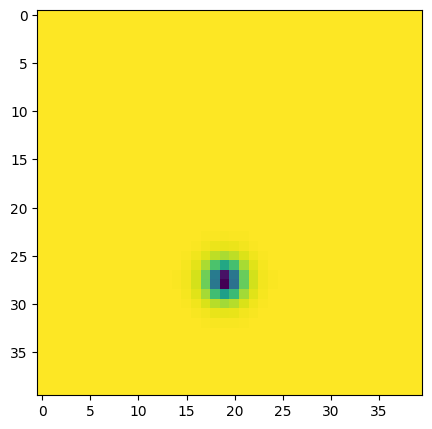

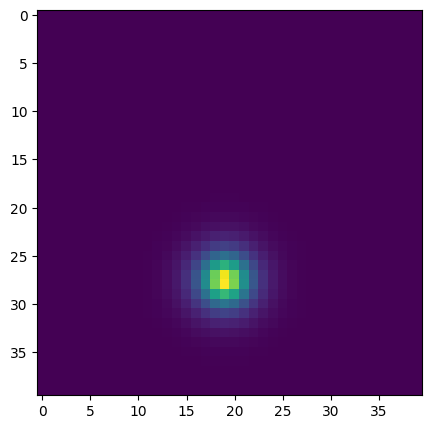


[INFO] BaseAviary.render() ——— it 0024 ——— wall-clock time 0.6s, simulation time 0.2s@120Hz (0.34x)
[INFO] BaseAviary.render() ——— drone 0 ——— x +00.01, y +00.01, z +02.00 ——— velocity +00.23, +00.07, +00.02 ——— roll -08.11, pitch +11.48, yaw -44.56 ——— angular velocity +0.2236, +0.4115, -7.3958 ——— 
[INFO] BaseAviary.render() ——— drone 1 ——— x +02.51, y +00.01, z +02.00 ——— velocity +00.22, +00.13, +00.01 ——— roll -07.11, pitch +12.27, yaw -01.65 ——— angular velocity -0.2114, -0.0052, +0.1740 ——— 
[INFO] BaseAviary.render() ——— drone 2 ——— x +04.99, y +00.01, z +02.00 ——— velocity -00.20, +00.18, +00.01 ——— roll -09.57, pitch -10.73, yaw +01.89 ——— angular velocity +0.0713, +0.1988, -0.0971 ——— 
[INFO] BaseAviary.render() ——— drone 3 ——— x +07.48, y +00.01, z +02.00 ——— velocity -00.24, +00.07, +00.01 ——— roll -03.38, pitch -13.85, yaw +00.85 ——— angular velocity +0.1051, -0.2261, +0.0178 ——— 

[INFO] BaseAviary.render() ——— it 0048 ——— wall-clock time 0.6s, simulation time 0.4s@120H

In [9]:
test_env = FlockingAviary(**env_kwargs)
logger = Logger(logging_freq_hz=DEFAULT_DECISION_FREQ,
                num_drones=DEFAULT_NUM_DRONE,
                output_folder=filename + '/test/')

obs,info = test_env.reset(seed=42)
start = time.time()

# 这里使用四边形场地进行验证？
TEST_DURATION = 40
for i in range(TEST_DURATION * test_env.DECISION_FREQ_HZ):
    action,_states = model.predict(obs,deterministic=True)
    obs, reward, terminated, truncated, info = test_env.step(action)

    for j in range(test_env.NUM_DRONES):
        logger.log(drone=j,
                    timestamp= i / test_env.DECISION_FREQ_HZ,
                    state=test_env.drone_states[j],
                    control=np.hstack([test_env.target_vs[j, :3],
                                          np.zeros(9)]) )
    test_env.render()
    if test_env.GUI:
        sync(i, start, 1 / test_env.DECISION_FREQ_HZ)

test_env.close()

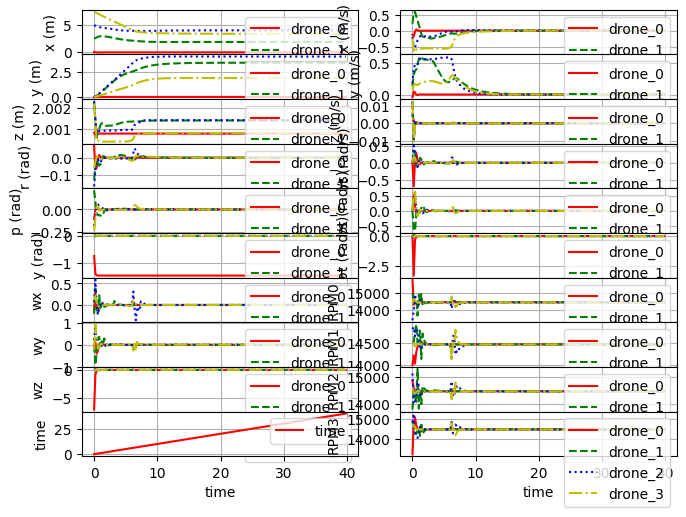

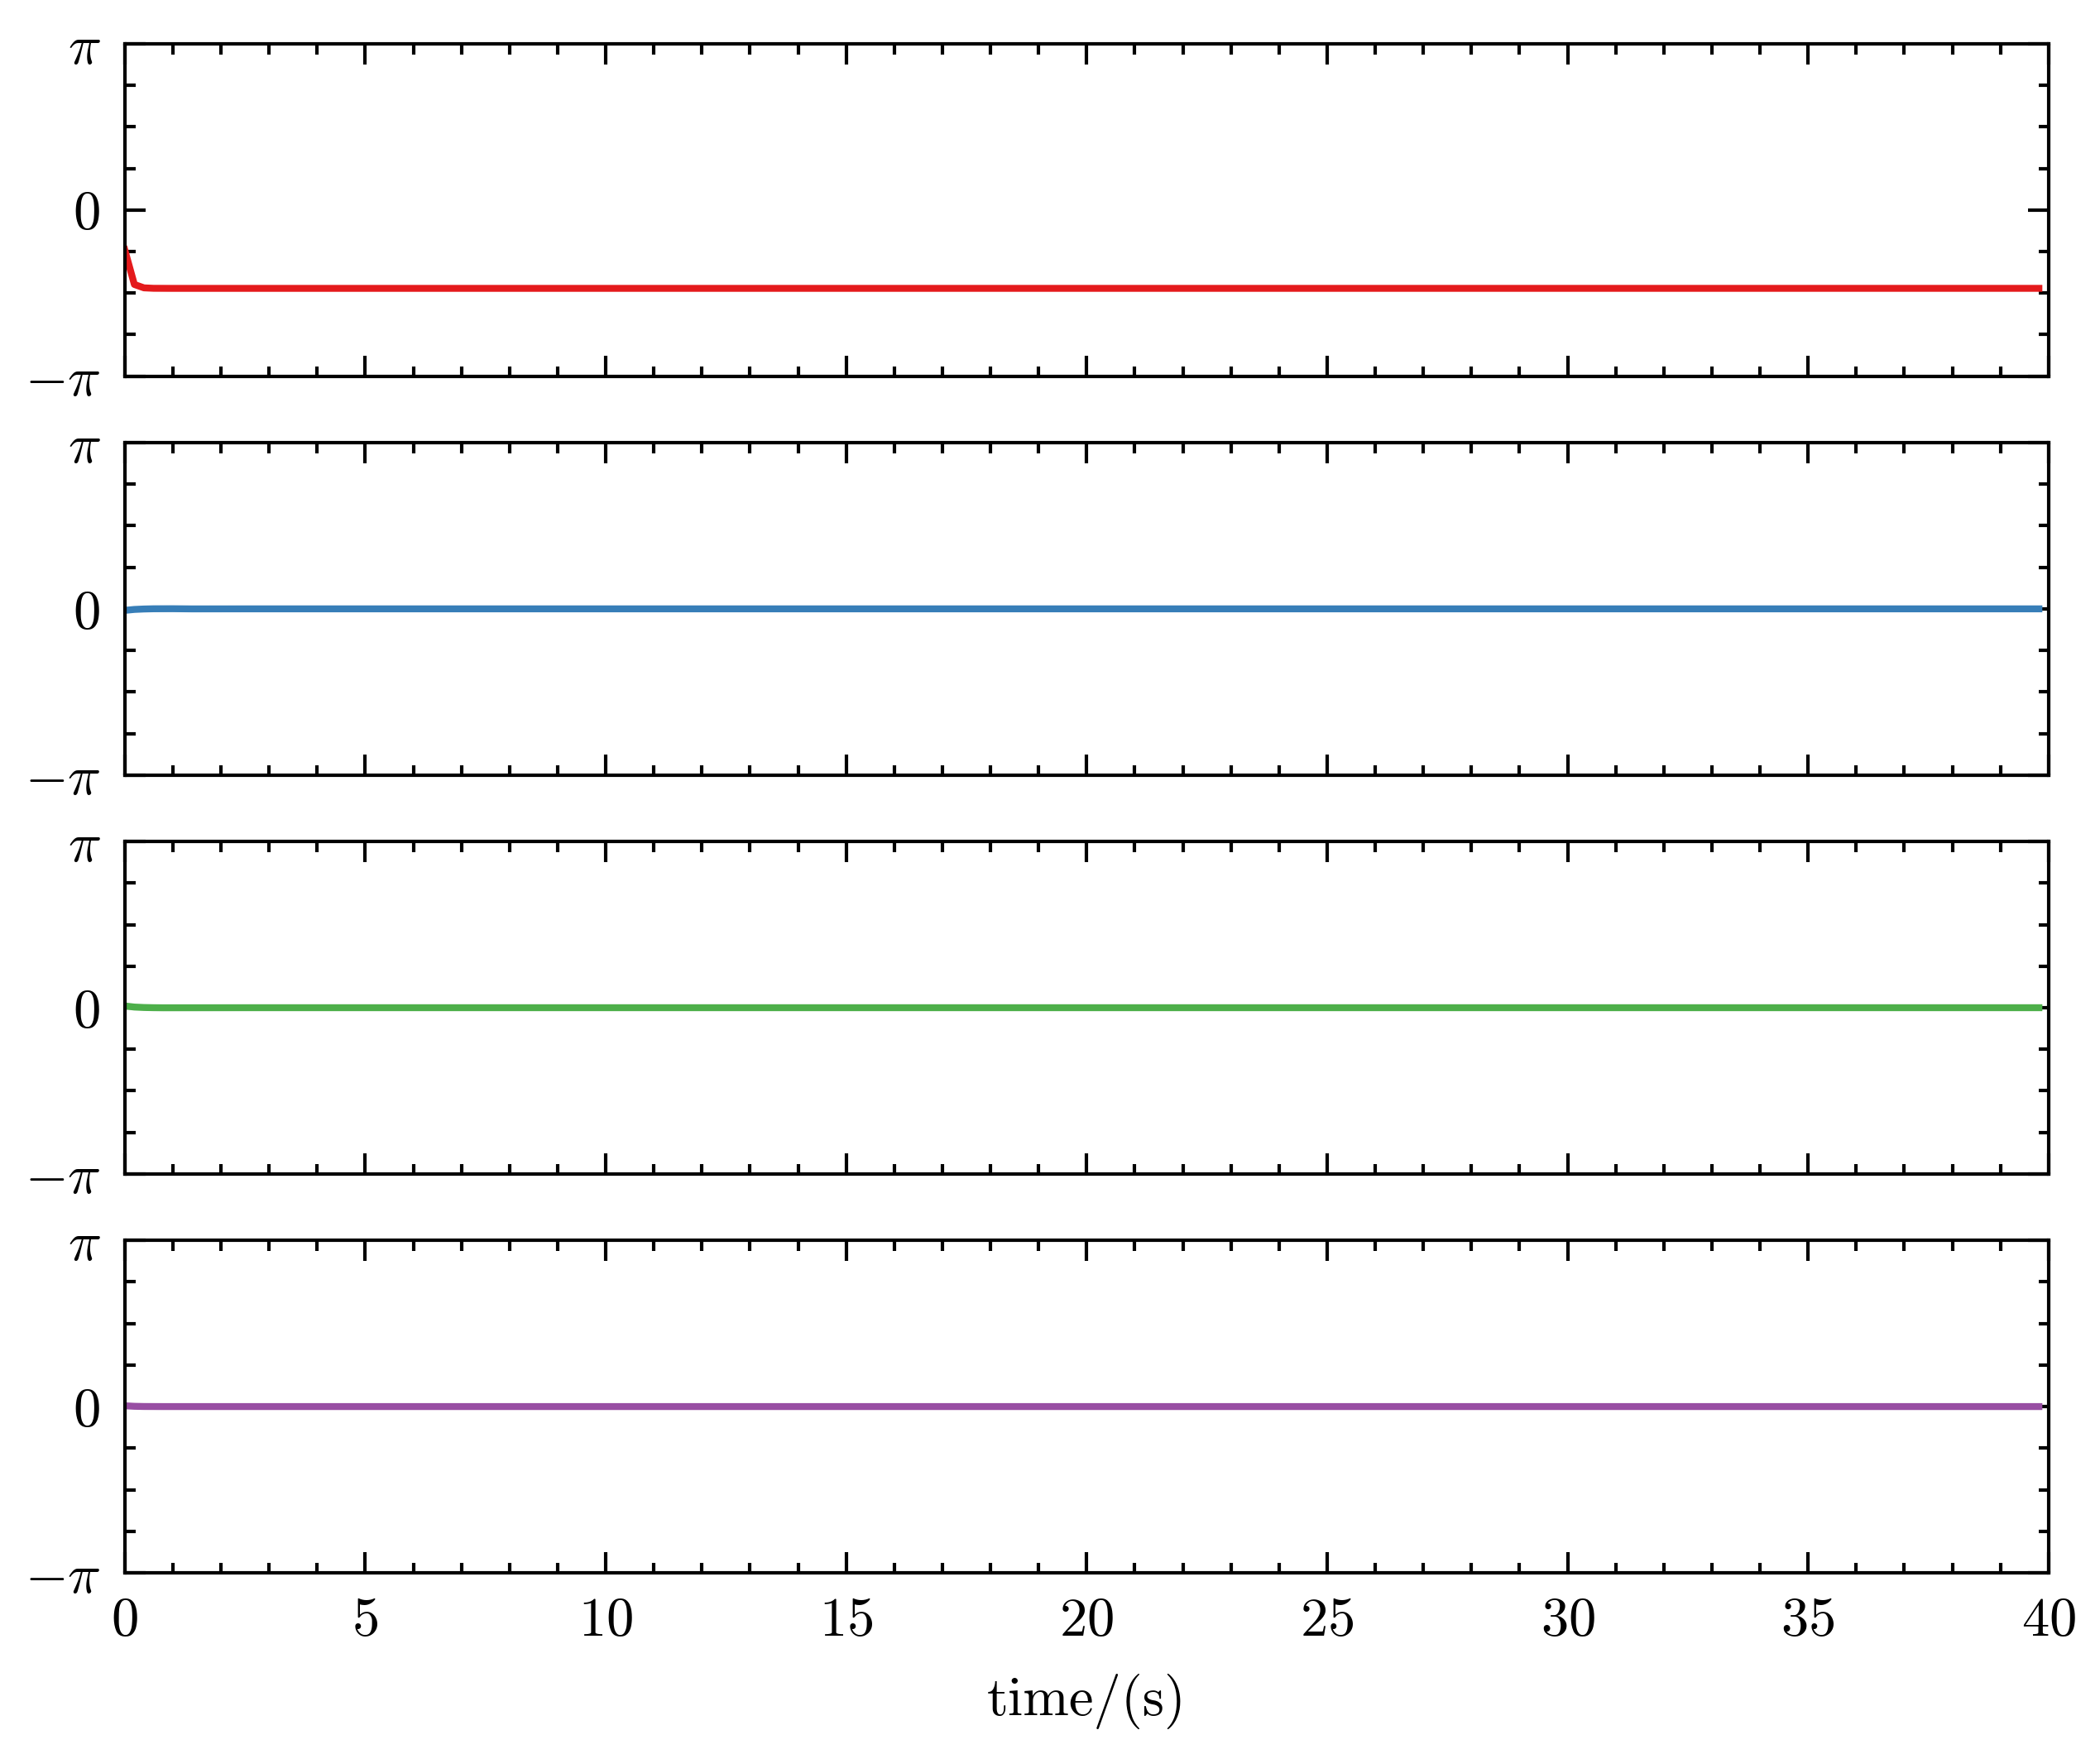

In [ ]:
if DEFAULT_PLOT:
    logger.plot()
    logger.plot_traj()